<a href="https://colab.research.google.com/github/Lakxz/customer-support-ticket-triage/blob/main/Week1_Customer_Support_Triage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import re
from datetime import timedelta

In [6]:
df=pd.read_csv("customer_support_tickets.csv")

In [7]:
print("Rows & Columns:", df.shape)

Rows & Columns: (8469, 17)


In [8]:
print("\nColumns:\n", df.columns)


Columns:
 Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


In [9]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [10]:
print("\nSample Ticket Descriptions:\n", df['Ticket Description'].head())


Sample Ticket Descriptions:
 0    I'm having an issue with the {product_purchase...
1    I'm having an issue with the {product_purchase...
2    I'm facing a problem with my {product_purchase...
3    I'm having an issue with the {product_purchase...
4    I'm having an issue with the {product_purchase...
Name: Ticket Description, dtype: object


In [11]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [12]:
df['clean_description'] = df['Ticket Description'].apply(clean_text)

In [13]:
def classify_issue(text):
    if any(word in text for word in ['payment', 'charged', 'billing', 'invoice']):
        return 'PAYMENT'
    elif any(word in text for word in ['login', 'password', 'signin', 'account']):
        return 'LOGIN'
    elif any(word in text for word in ['delivery', 'shipment', 'delay', 'shipping']):
        return 'DELIVERY'
    elif any(word in text for word in ['refund', 'return', 'money back']):
        return 'REFUND'
    elif any(word in text for word in ['bug', 'error', 'crash', 'issue']):
        return 'BUG'
    else:
        return 'GENERAL'

In [14]:
df['issue_category'] = df['clean_description'].apply(classify_issue)

In [15]:
def assign_priority(text):
    if any(word in text for word in ['urgent', 'critical', 'immediately', 'asap']):
        return 'P0'
    elif any(word in text for word in ['not working', 'failed', 'blocked']):
        return 'P1'
    elif any(word in text for word in ['slow', 'delay', 'problem']):
        return 'P2'
    else:
        return 'P3'

In [16]:
df['priority_level'] = df['clean_description'].apply(assign_priority)

In [17]:
sla_hours_map = {
    'P0': 4,
    'P1': 8,
    'P2': 24,
    'P3': 48
}

In [18]:
df['sla_hours'] = df['priority_level'].map(sla_hours_map)

In [19]:
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['sla_due_time'] = df['First Response Time'] + df['sla_hours'].apply(
    lambda x: timedelta(hours=x)
)

In [20]:
manager_report = df.groupby(
    ['issue_category', 'priority_level']
).agg(
    total_tickets=('Ticket ID', 'count'),
    avg_sla_hours=('sla_hours', 'mean')
).reset_index()

print("\n--- Support Manager Report ---\n")
print(manager_report)


--- Support Manager Report ---

   issue_category priority_level  total_tickets  avg_sla_hours
0             BUG             P0            125            4.0
1             BUG             P1             27            8.0
2             BUG             P2           1798           24.0
3             BUG             P3           4902           48.0
4        DELIVERY             P0              1            4.0
5        DELIVERY             P1              1            8.0
6        DELIVERY             P2             22           24.0
7        DELIVERY             P3             83           48.0
8         GENERAL             P0             60            4.0
9         GENERAL             P1              3            8.0
10        GENERAL             P2            240           24.0
11        GENERAL             P3             43           48.0
12          LOGIN             P0             13            4.0
13          LOGIN             P1            189            8.0
14          LOGIN     

In [21]:
df.to_csv("final_customer_support_report.csv", index=False)
manager_report.to_csv("support_manager_summary.csv", index=False)

print("\nFinal reports generated successfully")


Final reports generated successfully


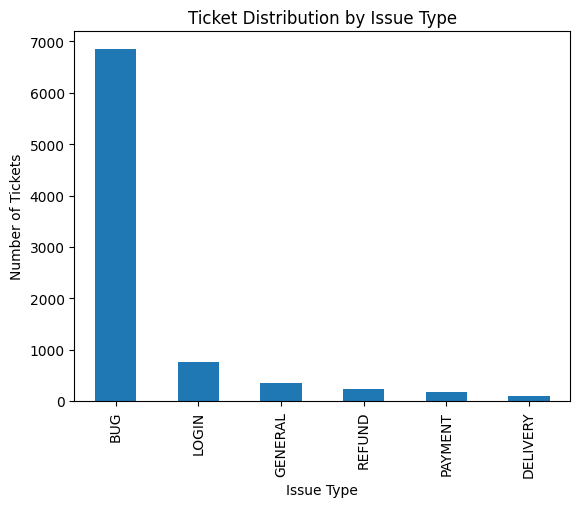

In [23]:
import matplotlib.pyplot as plt

df['issue_category'].value_counts().plot(kind='bar')
plt.title("Ticket Distribution by Issue Type")
plt.xlabel("Issue Type")
plt.ylabel("Number of Tickets")
plt.show()

In [24]:
df['clean_description'] = df['clean_description'].fillna('no description provided')

In [25]:
manager_report = df.groupby(
    ['issue_category', 'priority_level']
).agg(
    total_tickets=('Ticket ID', 'count'),
    avg_sla_hours=('sla_hours', 'mean')
).reset_index()
manager_report

,issue_category,priority_level,total_tickets,avg_sla_hours
0,BUG,P0,125,4.0
1,BUG,P1,27,8.0
2,BUG,P2,1798,24.0
3,BUG,P3,4902,48.0
4,DELIVERY,P0,1,4.0
5,DELIVERY,P1,1,8.0
6,DELIVERY,P2,22,24.0
7,DELIVERY,P3,83,48.0
8,GENERAL,P0,60,4.0
9,GENERAL,P1,3,8.0


In [30]:
df.to_csv("final_customer_support_report.csv", index=False)
manager_report.to_csv("support_manager_summary.csv", index=False)
print("CSV files exported")

CSV files exported
